In [1]:
import networkx
import math
import scipy.optimize
import numpy
import sys
from scipy import linalg
import matplotlib.pyplot as plt
from IPython.display import Image
import pywt
import scipy.fftpack
import random
import operator
import copy
from collections import deque
from sklearn.preprocessing import normalize
from sklearn.cluster import SpectralClustering
from matplotlib.lines import Line2D
from lib.io import *
from lib.vis import *
from lib.graph_signal_proc import *
from lib.netpros import *
from lib.syn import *
from lib.experiments import *
from lib.static import *
from lib.datasets import *

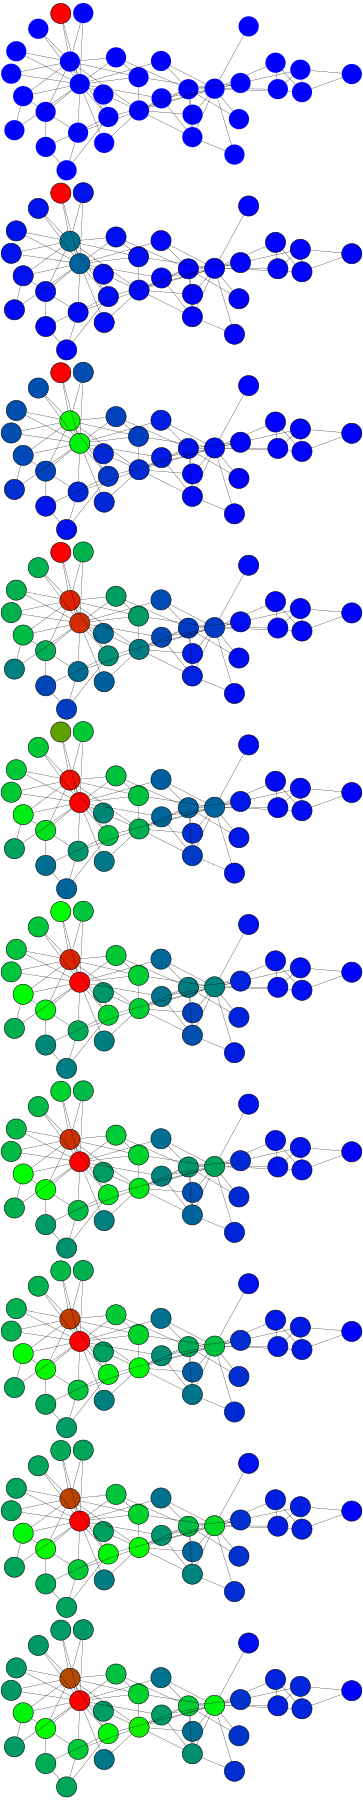

In [57]:
G=networkx.karate_club_graph()
syn_F = generate_dyn_heat(G, 1, 1, 10)

draw_graph_dynamic_values(G, syn_F, "karate_heat.svg")

from IPython.display import SVG

SVG(filename='karate_heat.svg')

In [60]:
(x1opt, x2opt) = eig_vis_opt(G, syn_F[5], 1000.)
(x1nc, x2nc) = eig_vis_nc(G)

In [40]:
def draw_graph_with_vectors(G, dot_output_file_name, v1, v2, maximum=None, minimum=None):
    output_file = open(dot_output_file_name, 'w')
    output_file.write("graph G{\n")
#    output_file.write("rankdir=\"LR\";\n")
#    output_file.write("size=\"2,2\";\n")

    if maximum is None:
        maximum = -sys.float_info.max
        minimum = sys.float_info.max

        for v in G.nodes():
            if G.node[v]["value"] > maximum:
                maximum = G.node[v]["value"]
     
            if G.node[v]["value"] < minimum:
                minimum = G.node[v]["value"]

    i = 0
    for v in G.nodes():
        color = rgb(minimum, maximum, G.node[v]["value"])
        output_file.write("\""+str(v)+"\" [shape=\"circle\",label=\"\",style=filled,fillcolor=\""+str(color)+"\",pos=\""+str(v1[i])+","+str(v2[i])+"\"];\n")
        i = i + 1
        
    for edge in G.edges():
        output_file.write("\""+str(edge[0])+"\" -- \""+str(edge[1])+"\"[dir=\"none\",color=\"black\",penwidth=\"1\"];\n")

    
    output_file.write("}")

    output_file.close()

In [67]:
draw_graph_with_vectors(G, "vector_karate_nc.dot", 700*x1nc, 700*x2nc)
set_f(G, syn_F[5])

! neato -n -Tsvg vector_karate_nc.dot > vector_karate_nc.svg

! rsvg-convert -f pdf -o  vector_karate_nc.pdf vector_karate_nc.svg

from IPython.display import SVG

SVG(filename='vector_karate_nc.SVG')

Format: "jpg" not recognized. Use one of: canon cmap cmapx cmapx_np dot eps fig gv imap imap_np ismap pic plain plain-ext pov ps ps2 svg svgz tk vml vmlz xdot xdot1.2 xdot1.4


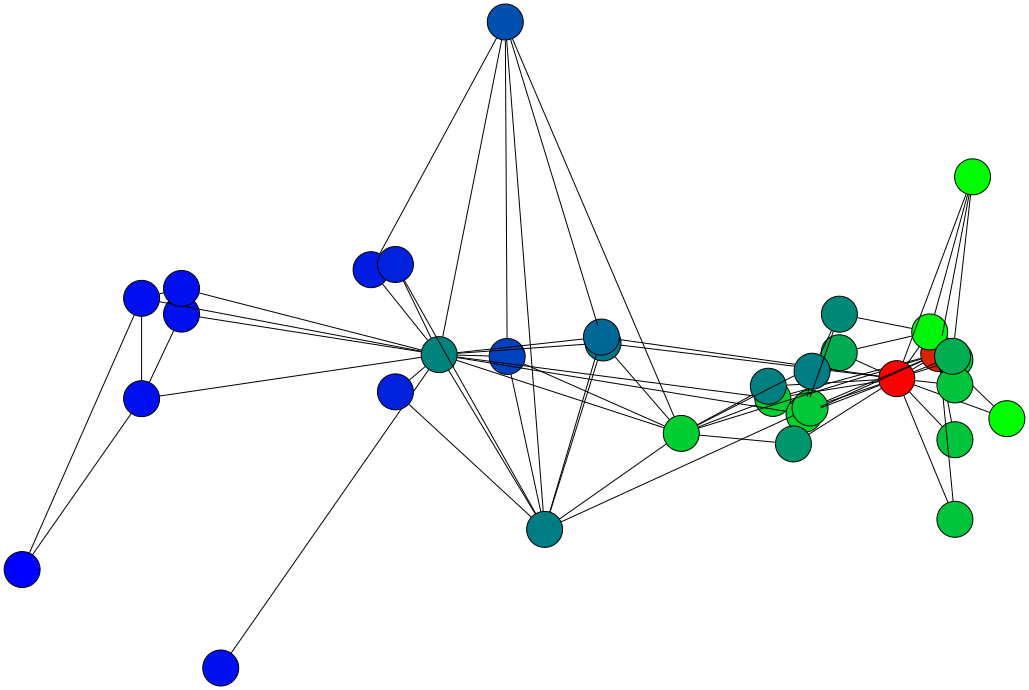

In [64]:
draw_graph_with_vectors(G, "vector_karate_opt.dot", 40000*x1opt, 40000*x2opt)
set_f(G, syn_F[5])

! neato -n -Tsvg vector_karate_opt.dot > vector_karate_opt.svg

! rsvg-convert -f pdf -o  vector_karate_nc.pdf vector_karate_nc.svg


from IPython.display import SVG

SVG(filename='vector_karate_opt.svg')

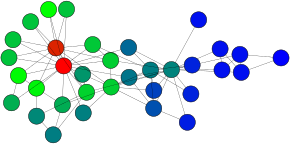

In [68]:
draw_graph_with_values(G, "karate.dot")

!sfdp -Goverlap=prism -Tsvg karate.dot > karate.svg

! rsvg-convert -f pdf -o  karate.pdf karate.svg


from IPython.display import SVG

SVG(filename='karate.svg')

In [69]:
G = read_graph(small_traffic["path"] + "traffic.graph", small_traffic["path"] + "traffic_100.data")
FT = read_dyn_graph(small_traffic["path"] + "traffic", small_traffic["num_snaps"], G) 

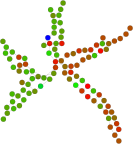

In [111]:
F = FT[8639]
set_f(G, F)

draw_graph_with_values(G, "traffic.dot")

!sfdp -Goverlap=prism -Tsvg traffic.dot > traffic.svg

! rsvg-convert -f pdf -o  traffic.pdf traffic.svg


from IPython.display import SVG

SVG(filename='traffic.svg')

In [121]:
(x1opt, x2opt) = eig_vis_opt(G, F, 10.)
(x1nc, x2nc) = eig_vis_nc(G)

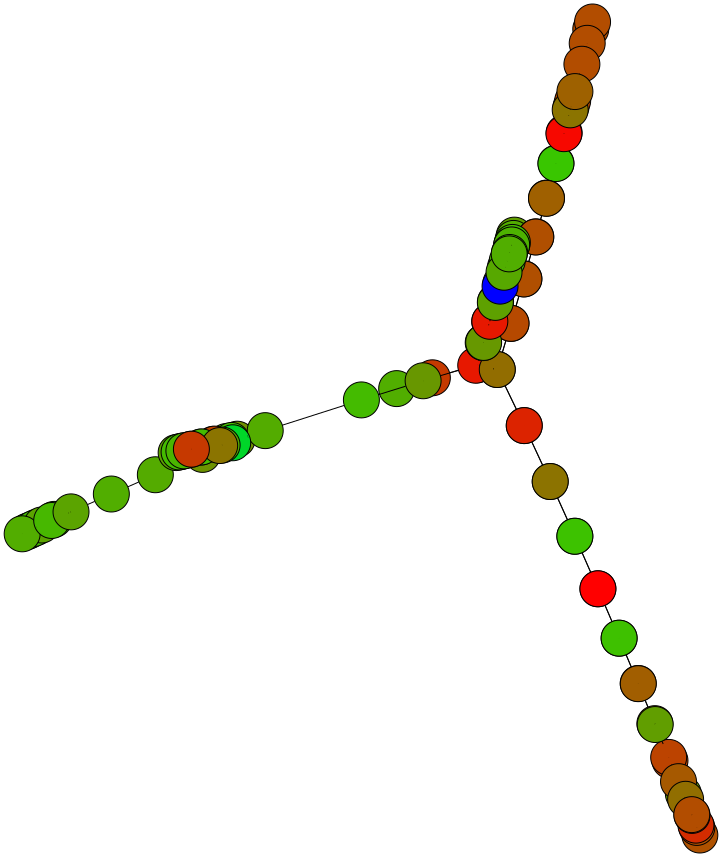

In [118]:
draw_graph_with_vectors(G, "vector_traffic_nc.dot", 2000*x1nc, 2000*x2nc)

! neato -n -Tsvg vector_traffic_nc.dot > vector_traffic_nc.svg

! rsvg-convert -f pdf -o  vector_traffic_nc.pdf vector_traffic_nc.svg

from IPython.display import SVG

SVG(filename='vector_traffic_nc.svg')

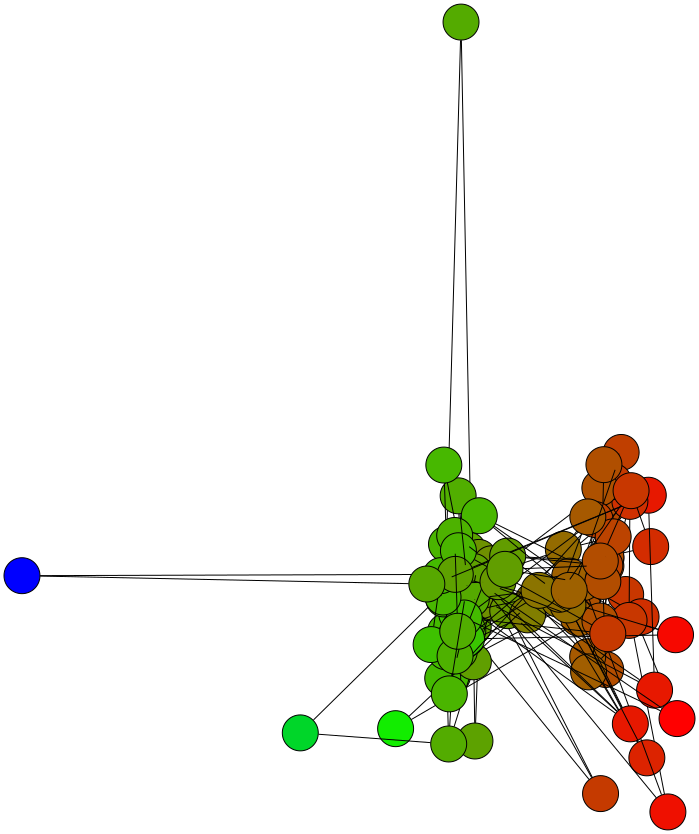

In [122]:
draw_graph_with_vectors(G, "vector_traffic_opt.dot", 10000*x1opt, 10000*x2opt)
! neato -n -Tsvg vector_traffic_opt.dot > vector_traffic_opt.svg

! rsvg-convert -f pdf -o  vector_traffic_opt.pdf vector_traffic_opt.svg


from IPython.display import SVG

SVG(filename='vector_traffic_opt.svg')